In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import yt
##yt.mylog.setLevel()
yt.utilities.logger.disable_stream_logging()

In [2]:
def quickProbePlot(kv_int,kh_int, dataDir):
    
    ts = yt.load(dataDir+"/plt000????/") # I'd love a way to make this quiet
    pointdata  = []
    time = []
    for ds in ts:
        pointdata.append(ds.point([1e9/2,1e9/2,0.])['rhopert'].value[0])
        time.append(float(ds.current_time))
    
    
    gamma = 5./3. 
    g = 3e4
    H = 1e9
    N2 = (gamma-1.)/gamma * g / H
    kv = kv_int * np.pi  / H
    kh = kh_int * np.pi / H
    k2 = kv**2 + kh**2 
    w2 = N2 * kh**2 / (k2 )
    w = np.sqrt(w2)
    
    print('kh_int=',kh_int)
    print('N=',np.sqrt(N2))
    print('w(expected)=',w)

    smoothTime = np.linspace(0,1e4,1e3)
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(time, pointdata, '+r', time, pointdata, 'r',
        smoothTime, pointdata[0] * np.cos(-w * smoothTime), 'b',
        smoothTime, pointdata[0] * np.cos(-w*np.sqrt(2) * smoothTime), 'g')

    plt.show()
    
    return

In [3]:
dataDir = "../single_level/"

kh_int= 4
N= 0.0034641016151377548
w(expected)= 0.0030983866769659332


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


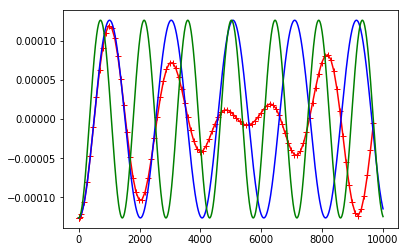

In [12]:
quickProbePlot(2, 4,dataDir)